#  Project: Investigate a Dataset - [Udemy Courses]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Udemy Courses

>The Dataset contains information about Udemy's subscribers and its courses from 2011 till 2017.


## Questions for Analysis:

>Which subject has the highest number of courses?

>Show all the courses which are free of cost and which subject is most frequent.

>Which are top and least selling courses?

>Show all graphic design courses where price is lower than 100.

>List all courses related with python.

>What are most subscribed courses that published in 2015?

>What are the max number of subscribers for each level of courses?

>Is there a correlation between price and number of subscribers?

>Is there a correlation between num of lectures and number of subscribers?

>What is the year of the highest number of subscribers?

>What is the month of the highest number of subscribers?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
df = pd.read_csv('Udemy Courses.csv')
df.head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [4]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


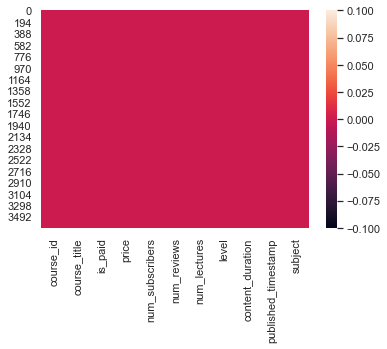

In [5]:
#Checking for null values..
sns.heatmap(df.isnull());

## Data Cleaning
### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>Changed the type of 'published_timestamp' into datetime64.

>Added to columns 'year', 'month' for better insights.

>Checked for null values.

>Checked for duplicates.

In [6]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], format='%Y-%m-%d')

In [7]:
# Adding the 'year' and 'month' columns..
df['year'] = df['published_timestamp'].dt.year
df['month'] = df['published_timestamp'].dt.month
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9


In [8]:
#Checking for duplicates...
df.duplicated().sum()

6

In [9]:
df.drop_duplicates(inplace =True)

In [10]:
df.duplicated().sum()

0

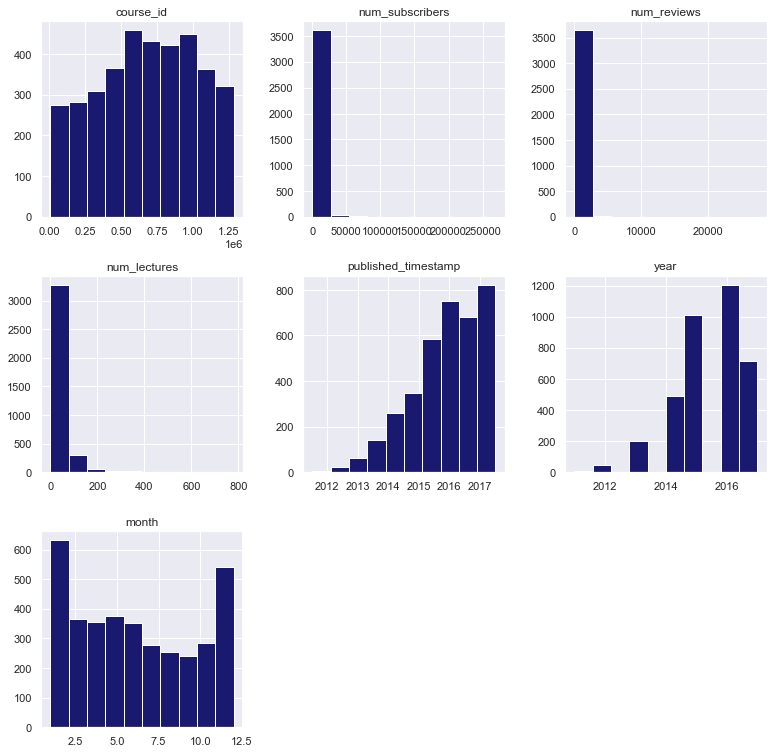

In [11]:
#An Overview of the dataset..
df.hist(figsize=(13,13),
        color = 'midnightblue');

# Q1: Which subject has the highest number of courses?

In [12]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9


In [13]:
df['subject'].unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [14]:
sub_course = df.groupby('subject')['course_title'].count().sort_values(ascending = False)
sub_course

subject
Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: course_title, dtype: int64

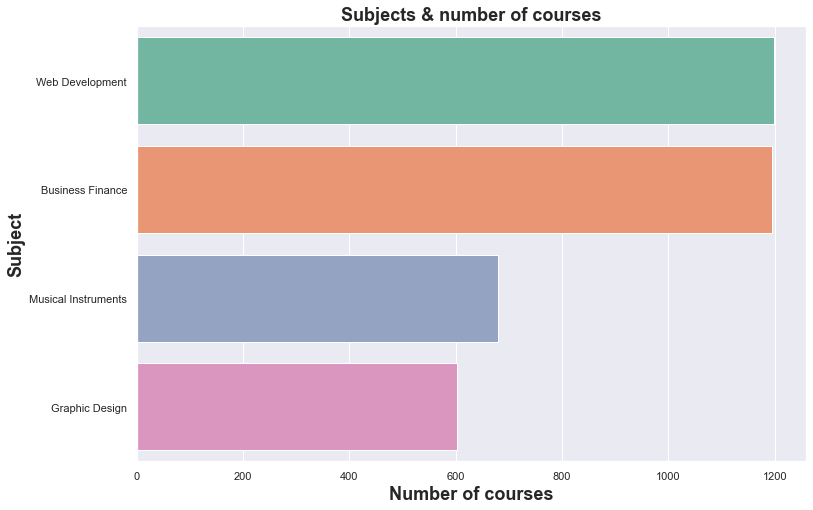

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x = sub_course, 
            y = sub_course.index,
            palette = 'Set2')
plt.title('Subjects & number of courses', fontsize = 18, weight = 'bold')
plt.xlabel('Number of courses',fontsize = 18, weight = 'bold')
plt.ylabel('Subject',fontsize = 18, weight = 'bold')
plt.show();

>Both Web Development & Business Finance almost have 1200 cousrse, Musical Instruments has 680, while Graphic Design has only  602 course.

# Q2: Show all the courses which are free of cost and which subject is most frequent

In [16]:
df.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017,4
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017,4


In [17]:
df['price'].unique()

array(['35', '75', '65', '200', '25', '100', '20', '40', '30', '45',
       '185', '120', '105', '50', 'Free', '145', '55', '85', '110', '150',
       '95', '180', '125', '60', '90', '195', '80', '70', '140', '190',
       '115', '130', '170', '175', '165', '135', '155', '160'],
      dtype=object)

In [18]:
free_df = df[df['price'] == 'Free']
free_df 

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23 05:08:14+00:00,Musical Instruments,2014,8
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21 18:50:50+00:00,Musical Instruments,2015,12
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13 21:51:59+00:00,Musical Instruments,2016,9
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10 20:19:10+00:00,Web Development,2014,8
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30 14:30:12+00:00,Business Finance,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15 00:21:56+00:00,Web Development,2015,7
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18 17:01:40+00:00,Web Development,2017,1
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03 17:45:31+00:00,Web Development,2016,3
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29 00:29:36+00:00,Musical Instruments,2017,6


In [19]:
free_subject = free_df.groupby('subject')['price'].count().sort_values(ascending = False)
free_subject

subject
Web Development        133
Business Finance        96
Musical Instruments     46
Graphic Design          35
Name: price, dtype: int64

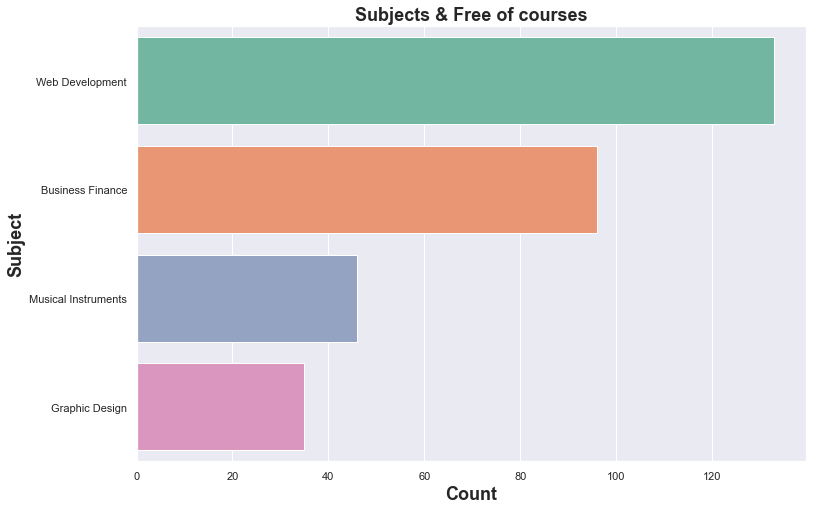

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x = free_subject, 
            y = free_subject.index,
            palette = 'Set2')
plt.title('Subjects & Free of courses', fontsize = 18, weight = 'bold')
plt.xlabel('Count',fontsize = 18, weight = 'bold')
plt.ylabel('Subject',fontsize = 18, weight = 'bold')
plt.show();


> There are 310 free courses, Web development has alone 133 of them.

# Q3: Which are top selling courses?

In [21]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9


In [22]:
top_selling = df.groupby('course_title')['num_subscribers'].sum().sort_values(ascending = False).head(20)
top_selling

course_title
Learn HTML5 Programming From Scratch                            268923
Coding for Entrepreneurs Basic                                  161029
The Web Developer Bootcamp                                      121584
Build Your First Website in 1 Week with HTML5 and CSS3          120291
The Complete Web Developer Course 2.0                           114512
Free Beginner Electric Guitar Lessons                           101154
Web Design for Web Developers: Build Beautiful Websites!         98867
Learn Javascript & JQuery From Scratch                           84897
Practical PHP: Master the Basics and Code Dynamic Websites       83737
JavaScript: Understanding the Weird Parts                        79612
Pianoforall - Incredible New Way To Learn Piano & Keyboard       75499
Angular 4 (formerly Angular 2) - The Complete Guide              73783
Beginner Photoshop to HTML5 and CSS3                             73110
Web Development By Doing: HTML / CSS From Scratch               

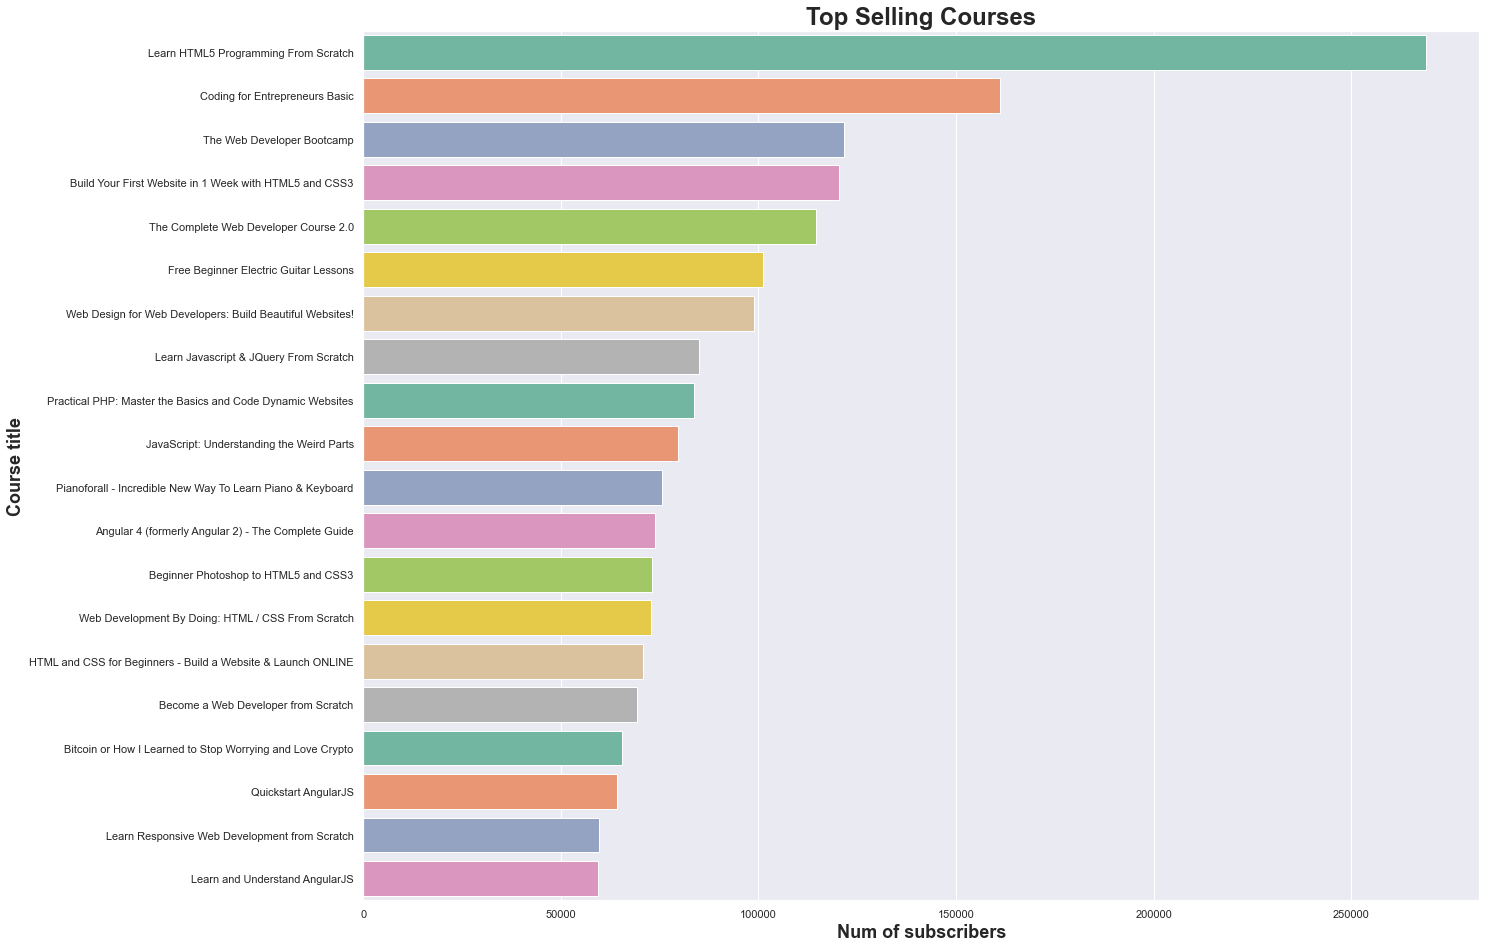

In [23]:
plt.figure(figsize=(20,16))
sns.barplot(x = top_selling, 
            y = top_selling.index,
            palette = 'Set2')
plt.title('Top Selling Courses', fontsize = 24, weight = 'bold')
plt.xlabel('Num of subscribers',fontsize = 18, weight = 'bold')
plt.ylabel('Course title',fontsize = 18, weight = 'bold')
plt.show();

>Learn HTML5 Programming From Scratch leads the charts with 268923 subscribers.

# Q4: Show all graphic design courses where price is lower than 100

In [24]:
df.subject.unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [25]:
df[(df['subject'] == 'Graphic Design')&(df['price'] < '100')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month


>No Graphic design courses less than 100 dollars.

# Q5: List all courses related with python

In [26]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9


In [27]:
python = df[df['course_title'].str.contains('Python')]
python

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
216,599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11 22:09:24+00:00,Web Development,2016,8
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08 00:46:14+00:00,Web Development,2013,4
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08 20:57:35+00:00,Web Development,2015,11
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29 00:58:43+00:00,Web Development,2014,5
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09 19:51:50+00:00,Web Development,2015,6
1932,1038538,Introduction to QGIS Python Programming,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22 00:11:22+00:00,Web Development,2016,12
1969,902888,Investment Portfolio Analysis with Python,True,50,209,13,37,All Levels,7 hours,2016-07-13 21:40:32+00:00,Business Finance,2016,7
2294,391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09 15:37:56+00:00,Web Development,2015,2
2295,1063722,Learn Python Django - A Hands-On Course,True,50,1339,21,18,Beginner Level,2 hours,2017-01-18 21:53:34+00:00,Web Development,2017,1
2341,546848,Learn to code in Python and learn Adobe Photos...,True,50,1132,1,29,All Levels,2 hours,2015-07-08 00:15:12+00:00,Graphic Design,2015,7


In [28]:
len(python)

29

>There is 29 courses related to python.

# Q6: What are most subscribed courses that published in 2015?

In [29]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9


In [30]:
year_15 = df.query('year == 2015')

In [31]:
courses_15 = year_15.groupby('course_title')['num_subscribers'].sum().sort_values(ascending = False).head(20)
courses_15

course_title
The Web Developer Bootcamp                                      121584
Web Design for Web Developers: Build Beautiful Websites!         98867
JavaScript: Understanding the Weird Parts                        79612
HTML and CSS for Beginners - Build a Website & Launch ONLINE     70773
Learn and Understand NodeJS                                      58208
The Complete HTML & CSS Course - From Novice To Professional     57422
Complete PHP Course With Bootstrap3 CMS System & Admin Panel     55332
Modern React with Redux                                          50815
Professional Logo Design in Adobe Illustrator                    44044
Build Responsive Real World Websites with HTML5 and CSS3         43977
Bootstrap 4 Quick Start: Code Modern Responsive Websites         41478
Ultimate Web Designer & Developer Course: Build 23 Projects!     33788
The Complete Ruby on Rails Developer Course                      33677
The Complete JavaScript Course For Web Development Beginners    

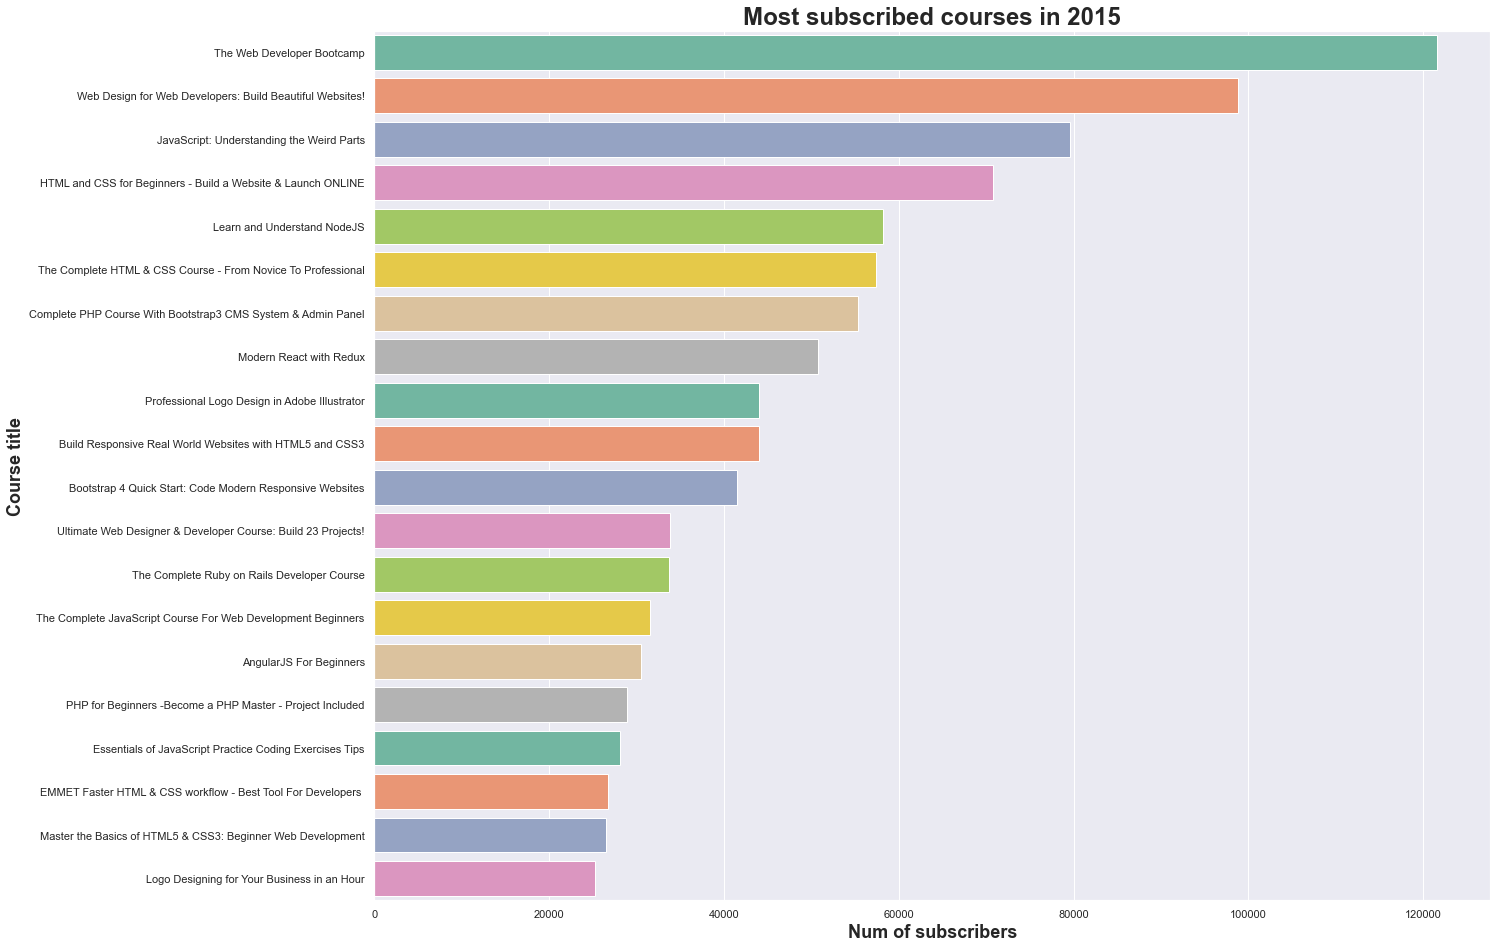

In [32]:
plt.figure(figsize=(20,16))
sns.barplot(x = courses_15, 
            y = courses_15.index,
            palette = 'Set2')
plt.title('Most subscribed courses in 2015', fontsize = 24, weight = 'bold')
plt.xlabel('Num of subscribers',fontsize = 18, weight = 'bold')
plt.ylabel('Course title',fontsize = 18, weight = 'bold')
plt.show();

>In 2015, Free Beginner Electric Guitar Lessons had 101154 subscribers.

# Q7: What are the max number of subscribers for each level of courses

In [33]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9


In [34]:
levels = df.groupby('level')['num_subscribers'].max().sort_values(ascending = False)
levels

level
All Levels            268923
Beginner Level        161029
Intermediate Level     29167
Expert Level            5172
Name: num_subscribers, dtype: int64

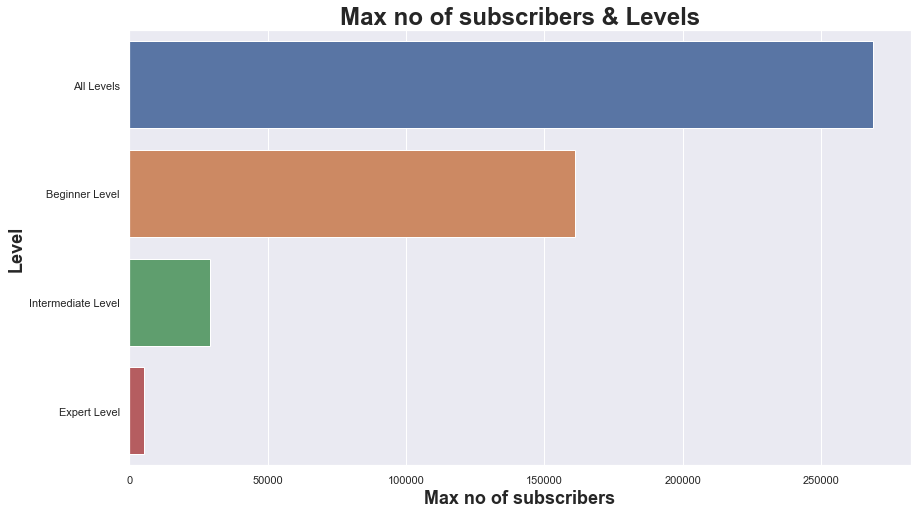

In [35]:
plt.figure(figsize=(14,8))
sns.barplot(x = levels, 
            y = levels.index)
plt.title('Max no of subscribers & Levels', fontsize = 24, weight = 'bold')
plt.xlabel('Max no of subscribers',fontsize = 18, weight = 'bold')
plt.ylabel('Level',fontsize = 18, weight = 'bold')
plt.show();

>All Levels has a maximum subscribers of 268923, while Expert Level has only 5172 maximum subscribers.

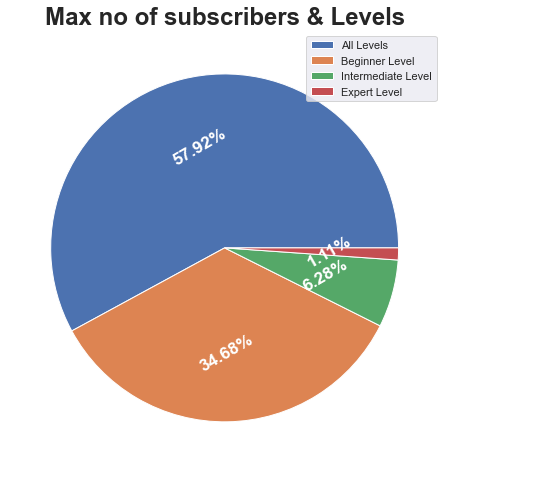

In [36]:
plt.figure(figsize=(16,8))
plt.pie(levels, labels=levels.index, autopct= '%.2f%%',
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Max no of subscribers & Levels', fontsize = 24, fontweight = 'bold')     
plt.legend()
plt.show()

In [37]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3681
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3676 non-null   int64              
 1   course_title         3676 non-null   object             
 2   is_paid              3676 non-null   bool               
 3   price                3676 non-null   object             
 4   num_subscribers      3676 non-null   int64              
 5   num_reviews          3676 non-null   int64              
 6   num_lectures         3676 non-null   int64              
 7   level                3676 non-null   object             
 8   content_duration     3676 non-null   object             
 9   published_timestamp  3676 non-null   datetime64[ns, UTC]
 10  subject              3676 non-null   object             
 11  year                 3676 non-null   int64              
 12  month               

In [39]:
df['price'] = pd.to_numeric(df['price'])

ValueError: Unable to parse string "Free" at position 41

>We should replace "Free" in price column with '0'.

In [ ]:
df['price'].replace({'Free' : 0}, inplace = True)

In [ ]:
df['price'] = pd.to_numeric(df['price'])

In [ ]:
df.info()

# Q8: Is there a correlation between price and number of subscribers?

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'price',
                y = 'num_subscribers',
                data = df,
                hue = 'subject',
                s = 200)
plt.title('Distribution of price and num of subscribers', fontsize = 24, weight = 'bold')
plt.xlabel('Price', fontsize = 18, weight = 'bold')
plt.ylabel('Number of subscribers', fontsize = 18, weight = 'bold')
plt.show();

> If we exclude Free course, Price seems to not have a strong relation with number of subscribers.

# Q9: Is there a correlation between num of lectures and number of subscribers?

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'num_lectures',
                y = 'num_subscribers',
                data = df,
                hue = 'subject',
                s = 200)
plt.title('Distribution of num of lectures and num of subscribers', fontsize = 24, weight = 'bold')
plt.xlabel('Number of lectures', fontsize = 18, weight = 'bold')
plt.ylabel('Number of subscribers', fontsize = 18, weight = 'bold')
plt.show();

>Courses that have number of lectures less than 100 have higher number of subscribers.

# Q10: What is the year of the highest number of subscribers?

In [ ]:
year_sub = df.groupby('year')['num_subscribers'].sum().sort_values(ascending = False)
year_sub

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(x = year_sub.index,
            y = year_sub,
            palette = 'Set2')
plt.title('Num of subscribers per year', fontsize = 24, weight = 'bold')
plt.xlabel('Year', fontsize = 18, weight = 'bold')
plt.ylabel('Number of subscribers per million', fontsize = 18, weight = 'bold')
plt.show();

>In 2015, there were 3475324 subscribers, compared to only 119028 subscribers in 2011.

# What is the month of the highest number of subscribers?

In [ ]:
month_sub = df.groupby('month')['num_subscribers'].sum().sort_values(ascending = False)
month_sub

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(x = month_sub.index,
            y = month_sub,
            palette = 'Set2')
plt.title('Num of subscribers per month', fontsize = 24, weight = 'bold')
plt.xlabel('Month', fontsize = 18, weight = 'bold')
plt.ylabel('Number of subscribers per million', fontsize = 18, weight = 'bold')
plt.show();

>October, February and March associated with the highest number of subscribers.

<a id='conclusions'></a>
# Conclusions:

>Both Web Development & Business Finance almost have 1200 cousrse, Musical Instruments has 680, while Graphic Design has only  602 course.

>There are 310 free courses, Web development has alone 133 of them.

>Learn HTML5 Programming From Scratch leads the charts with 268923 subscribers.

>No Graphic design courses less than 100 dollars.

>There is 29 courses related to python.

>In 2015, Free Beginner Electric Guitar Lessons had 101154 subscribers.

>All Levels has a maximum subscribers of 268923, while Expert Level has only 5172 maximum subscribers.

> If we exclude Free course, Price seems to not have a strong relation with number of subscribers.

>Courses that have number of lectures less than 100 have higher number of subscribers.

>In 2015, there were 3475324 subscribers, compared to only 119028 subscribers in 2011.

>October, February and March associated with the highest number of subscribers.